In [1]:
#### 2.3.1. Загрузка данных и первичный осмотр
#1. Импортировать необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#2. Загрузить учебный датасет в `pandas.DataFrame` с помощью `pd.read_csv` (или другого подходящего метода)
df = pd.read_csv("S02-hw-dataset.csv")

#3. Вывести

#- первые строки датасета (`head()`),
print("Первые строки датасета:")
print(df.head(), end='\n\n')

#- информацию о столбцах и типах (`info()`),
print("Информация о столбцах и типах: ")
print(df.info(), end='\n\n')

#- базовые описательные статистики (`describe()` или аналог).
print("Базовые описательные статистики: ")
print(df.describe())

Первые строки датасета:
   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296

Информация о столбцах и типах: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None

Базовые описательные статистики: 
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259  

In [2]:
#### 2.3.2. Пропуски, дубликаты и базовый контроль качества

#1. Посчитать долю пропусков в каждом столбце (например, через `isna().mean()` или аналог).
print("Доля пропусков в каждом столбце:")
print(df.isna().mean(), end='\n\n')

#2. Проверить наличие полностью дублирующих строк (через `duplicated()`).
print("Проверка на дубликаты: ")
duplicates = df[df.duplicated(keep=False)]
print(f'Дублирующихся строк в датасете: {len(duplicates)}', end='\n\n')

#3. Найти и вывести «подозрительные» случаи, исходя из смысла датасета. Примеры
print('"Подозрительные" случаи')
#- отрицательные значения в полях, где их не должно быть (количество, цена и т.п.);
negativeValues = df[(df["age"] < 0) | (df["purchases"] < 0) | (df["revenue"] < 0)]
print("Строки с отрицательными значениями полей, которые не должны быть таковыми: ",)
print(negativeValues, end='\n\n')
#- нереалистичные значения (например, возраст > 100, нулевой доход при ненулевых количествах покупок и т.п.);
anomalyValues = df[(df["age"] > 100) | ((df["revenue"] == 0) & (df["purchases"] > 0))]
print("Строки с нереалистичными значениями: ")
print(anomalyValues, end='\n\n')
#- другие логические противоречия, характерные для конкретного датасета.
print("Проверка на наличие прибыли при нулевых количествах: ")
print(df[(df["purchases"] == 0) & (df["revenue"] > 0)])

Доля пропусков в каждом столбце:
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Проверка на дубликаты: 
Дублирующихся строк в датасете: 2

"Подозрительные" случаи
Строки с отрицательными значениями полей, которые не должны быть таковыми: 
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785

Строки с нереалистичными значениями: 
    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
10       11   24.0      US          4        0

Проверка на наличие прибыли при нулевых количествах: 
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []


4. Кратко (1-2 абзаца) описать текстом, какие проблемы качества данных были обнаружены.

С помощью .mean() видим, что в датасете ~5% строк не имеют значения в поле age. Зная, что в датасете 41 строка, можем рассчитать, сколько именно таких строк присутствует в
датасете: 5% * 41 = 2 строки.

Определили, что в строке 5 имеется отрицательное значение покупок и нереалистичный возраст - 120 лет, а в строке 10 нулевая прибыль при ненулевом количестве покупок.

Нужно будет учитывать эти проблемы качества при дальнейшей работе с датасетом.



In [3]:
#### 2.3.3. Базовый EDA: группировки, агрегаты и частоты

#1. Посчитать частоты для одной или двух категориальных переменных (например, `value_counts()` для столбца с категорией/страной/классом).
print("Частоты по странам:")
countryCounts = df["country"].value_counts()
print(countryCounts, end="\n\n")

#2. Выполнить хотя бы одну осмысленную группировку с агрегатами через `groupby`:
#- например, среднее и сумму по количественным признакам в разрезе категорий.
print("Группировка по странам:")
countryGroupStats =  df.groupby("country").agg({
    "age": ["mean", "median"],
    "purchases": ["mean", "median", "sum"],
    "revenue": ["mean", "median", "sum"]
}) #Группируем значения по странам и добавляем агрегаты
print(countryGroupStats, end="\n\n")

#3. При необходимости ввести дополнительные «коридоры» (bins) или группировки (например, возрастные группы, диапазоны значений и т.п.).
print("Добавим в таблицу новый столбец, отвечающий за возрастную группу и сделаем ещё одну группировку с агрегатами: ")
df["ageGroup"] = pd.cut(df["age"], bins=[0, 25, 35, 45, 55, 120], labels=["<25", "25-35", "35-45", "45-55", ">55"])
ageGroupStats = df.groupby("ageGroup").agg({
    "purchases": ["mean", "median", "sum"],
    "revenue": ["mean", "median", "sum"]
})
print(ageGroupStats)

Частоты по странам:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Группировка по странам:
               age        purchases                 revenue               
              mean median      mean median sum         mean  median    sum
country                                                                   
CN       24.000000   24.0  4.500000    4.5   9  1054.000000  1054.0   2108
DE       34.600000   35.0  6.500000    6.0  39  1445.500000  1200.0   8673
FR       46.250000   42.0  4.250000    6.0  51   675.916667   619.5   8111
RU       30.076923   26.0  4.769231    6.0  62   790.076923   650.0  10271
US       36.714286   39.0  4.625000    4.0  37   557.375000   537.5   4459

Добавим в таблицу новый столбец, отвечающий за возрастную группу и сделаем ещё одну группировку с агрегатами: 
         purchases                 revenue              
              mean median sum         mean median    sum
ageGroup                                          

C:\Users\Андрей\AppData\Local\Temp\ipykernel_15012\746371206.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageGroupStats = df.groupby("ageGroup").agg({


4. Кратко (1-2 абзаца) описать текстом основные наблюдения:
   - какие категории доминируют,
   - как отличаются группы по средним значениям,
   - есть ли неожиданные эффекты.

Из полученных данных заметно, что по общему количеству записей в датасете лидирует Россия и Франция, меньше всего - у Китая. 

Из таблицы, сгрупированной по странам, видно, что наиболее старые пользователи находятся в Франции и США, а самые молодые - в Китае и Германии; по сумме количества проведённых покупок лидирует Россия, а в Китае - всего 9 покупок; по прибыли также лидирует Россия, а Китай отстаёт больше всего, НО стоит заметить один неожиданный эффект: медианное и среднее значения прибыли в Китае  и Германии выше, чем в России.

Из таблицы, сгруппированной по возрастам, видно, что больше всего покупок совершают люди меньше 25 лет, а меньше всего - пользователи старше 55; но, тем не менее, среднее значение прибыли наивысшее для пользователей от 35 до 45 лет, а наименьшее для пользователей от 45 до 55.

При рассмотрении всех этих наблюдений, перед тем как делать какие-либо выводы, стоит обязательно учесть то, что в датасете в целом меньше информации по Китаю и Германии, чем по другим странам. Это может сильно повлиять на некоторые заключения, так как для корректной статистики по этим странам требуется больше записей.

Гистограмма по возрасту: 


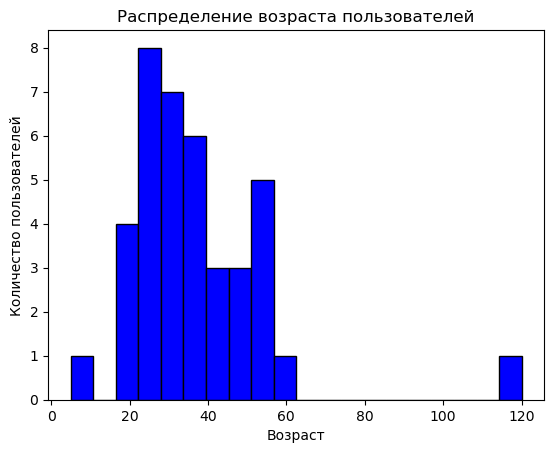

In [4]:
### 2.4. Визуализация данных в Matplotlib
'''
1. **Одну гистограмму** для количественного признака:
   - осмысленный выбор числа корзин (`bins`),
   - подписи осей и заголовок.
'''
print("Гистограмма по возрасту: ")
plt.figure()
plt.hist(df["age"].dropna(), bins=20, color="blue", edgecolor="black")
plt.title("Распределение возраста пользователей")
plt.xlabel("Возраст")
plt.ylabel("Количество пользователей")
plt.savefig("figures/ageHist.png")
plt.show()

График показывает распределение популярности возрастов среди пользователей. Из этой гистограммы убеждаемся, что самый популярный возраст среди пользователей +-23года. Помимо этого заметны два выброса: пользователи с возрастом около 10 и 120 лет.

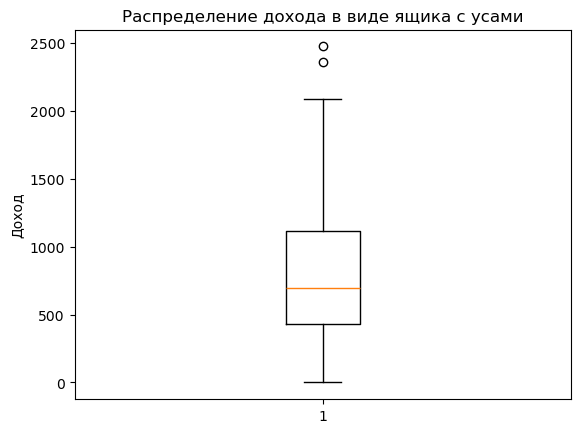

In [26]:
'''
2. **Один боксплот (boxplot)** для количественного признака:
   - можно как общий, так и по группам (например, по категориям),
   - подписи оси и заголовок.
'''
plt.figure()
plt.boxplot(df["revenue"])
plt.title("Распределение дохода в виде ящика с усами")
plt.ylabel("Доход")
plt.savefig("figures/revenueBoxplot.png")
plt.show()

График представляет распределение значений прибыли среди пользователей. По данному графику видим, что среднее значение прибыли находится в нижнем диапозоне значений. Медианное значение чуть ниже среднего арифметического. Имеются выбросы в виде двух значений, стремящихся к 2500

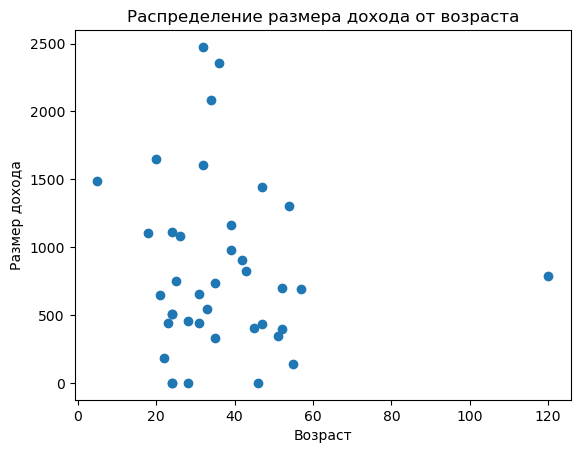

In [27]:
'''
3. **Один scatter plot** (диаграмма рассеяния) для пары количественных признаков:
   - подписи обеих осей,
   - заголовок,
   - при желании можно добавить цвет/легенду для различения категорий.
'''
plt.figure()
plt.scatter(df["age"], df["revenue"])
plt.title("Распределение размера дохода от возраста")
plt.xlabel("Возраст")
plt.ylabel("Размер дохода")
plt.savefig("figures/ageRevenueScatter.png")
plt.show()

График представляет зависимость значений дохода от возраста. Этот график предоставляет возможность убедиться в ранее подмеченной закономерности: наибольший размер дохода наблюдается у пользователей возраста около 35 лет, а также виден видны выбросы значений возраста и прибыли. Наиболее популярной пользовательской базой являются люди возрастов от 20 до 40 лет.